Blatt 6
Aufgabe 1

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter

filepaths = {
    0: 'data\Apfel klein.JPG',
    1: 'data\Eigenweg.jpg',
    2: 'data\JC409.jpg',
    3: 'data\PerlitStruktur3.jpg',
    4: 'data\mona_lisa.jpg'
}

def read_image(image_number):
    img = cv2.imread(filename=filepaths.get(image_number))
    if len(img.shape)>2:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img



def gaussian_blur(img, disksize, verbose=False):
    y, x = img.shape
    u = np.linspace(-x/2,x/2-1,x)
    v = np.linspace(-y/2,y/2-1,y)
    U, V = np.meshgrid(u, v)
    disk = abs(U**2+V**2) < (disksize*x)**2

    if verbose:
        fig = plt.figure(figsize=(20, 15))
        ax = fig.add_subplot(1, 2, 1)
        ax.set_title('Orig Image')
        ax.imshow(img, cmap='gray', vmin = 0, vmax = 255)
        ax = fig.add_subplot(1, 2, 2)
        ax.set_title(f'Gaussian blured image with disksize={disksize}')
        ax.imshow(disk, cmap='gray', vmin = 0, vmax = 255)
    return img


def gaussian_blur2(img, sigma = 1, verbose = False):
    img_blur = gaussian_filter(img, sigma=sigma)
    
    if verbose:
        fig = plt.figure(figsize=(20, 15))
        ax = fig.add_subplot(1, 2, 1)
        ax.set_title('Orig Image')
        ax.imshow(img, cmap='gray', vmin = 0, vmax = 255)
        ax = fig.add_subplot(1, 2, 2)
        ax.set_title(f'Gaussian blured image with sigma={sigma}')
        ax.imshow(img_blur, cmap='gray', vmin = 0, vmax = 255)

    return 


def gaussian_noise2(img, sigma = 1, verbose = False):
    mean = 0.0   # some constant
    std = sigma    # some constant (standard deviation)
    noisy_img = img + np.random.normal(mean, std, img.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255) 
    if verbose:
            fig = plt.figure(figsize=(20, 15))
            ax = fig.add_subplot(1, 2, 1)
            ax.set_title('Input Image')
            ax.imshow(img, cmap='gray', vmin = 0, vmax = 255)
            ax = fig.add_subplot(1, 2, 2)
            ax.set_title(f'noisy image')
            ax.imshow(noisy_img_clipped, cmap='gray', vmin = 0, vmax = 255)

    return noisy_img_clipped


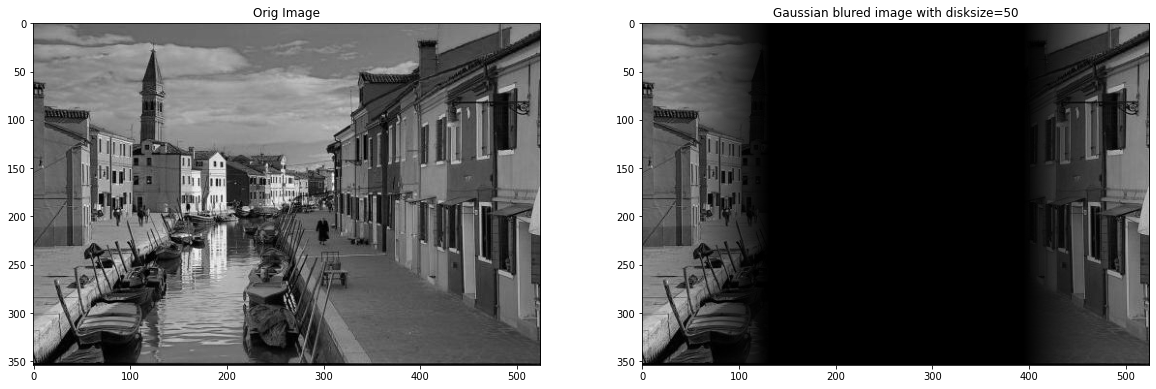

In [59]:
image_number = 2
disksize = 50
img = read_image(image_number)

y, x = img.shape
u = np.linspace(-x/2,x/2-1,x)
v = np.linspace(-y/2,y/2-1,y)
U, V = np.meshgrid(u, v)
disk = abs(U**2+V**2) < ((disksize*x)**2)
verbose = True

img_fft = np.fft.fftshift(np.fft.fft2(img))
img_blur = np.fft.ifft2(np.fft.fftshift(img_fft*disk))
# img_fft = np.fft.fft2(img)
# img_blur = np.fft.ifft2(img_fft*disk)

if verbose:
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(1, 2, 1)
    ax.set_title('Orig Image')
    ax.imshow(img, cmap='gray', vmin = 0, vmax = 255)
    ax = fig.add_subplot(1, 2, 2)
    ax.set_title(f'Gaussian blured image with disksize={disksize}')
    ax.imshow(np.real(img_blur), cmap='gray', vmin = 0, vmax = 255)




#img_blur = gaussian_blur(img, 50, True)


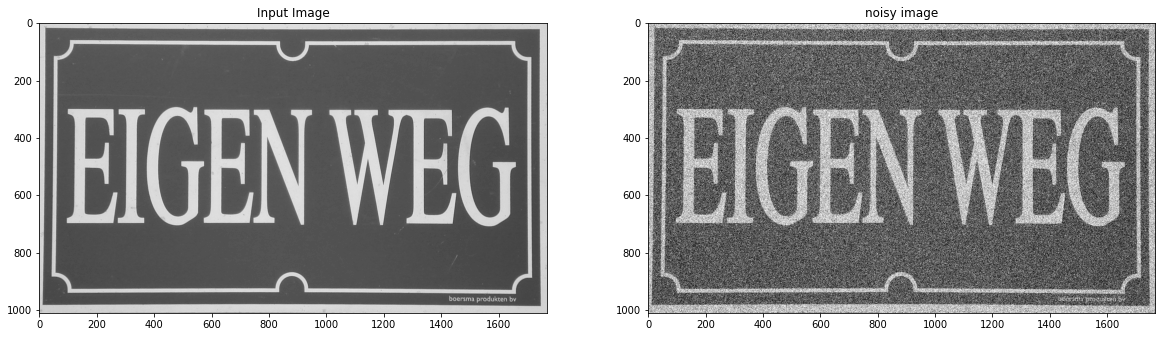

In [4]:
img_noise = gaussian_noise(img, 100, True)